LAB 6

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [47]:
file_path = 'D:\\BHAVIKA\\sem 5\\FDS\\dataset\\nearest-earth-objects(1910-2024).csv'
data = pd.read_csv(file_path)

In [5]:
#QUESTION A1

#(a)
def sum_unit(inputs, weights, bias):
    #sum of inputs * their weights, + bias
    total = 0
    for i in range(len(inputs)):
        total += inputs[i] * weights[i]
    return total + bias

#(b)
def step(val): #step func
    return 1 if val > 0 else 0

def bipolar_step(val): #bipolar step func
    return 1 if val > 0 else -1

def sigmoid(val): #sigmoid func
    return 1 / (1 + (2.71828 ** -val))

def tanh(val): #tanh funct
    return (2 / (1 + (2.71828 ** (-2 * val)))) - 1

def relu(val):  #relu func
    return max(0, val)

def leaky_relu(val):  #leaky relu func
    return val if val > 0 else 0.01 * val

#(c)
def error_comparator(predicted, actual):
    return actual - predicted

final weights: [-0.1   0.1   0.05]
no. of epochs: 129


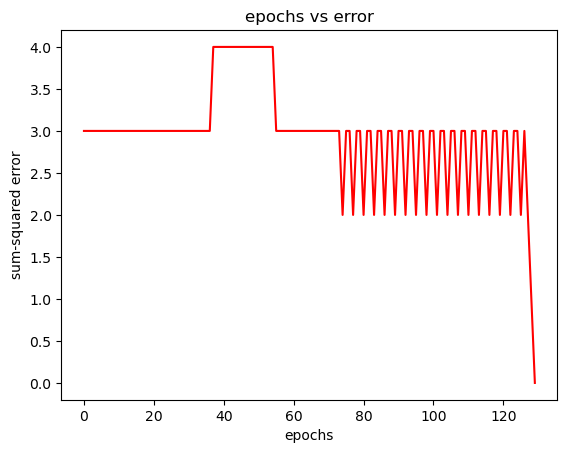

In [7]:
#QUESTION A2

import numpy as np
import matplotlib.pyplot as plt

#perceptron func
def perceptron_train(X, y, W0, W1, W2, alpha, max_epochs=1000, threshold=0.002):
    epochs = 0
    error_history = []
    weights = np.array([W0, W1, W2])
    
    while epochs < max_epochs:
        total_error = 0
        for i in range(len(X)):
            #input with bias
            inputs = np.append(1, X[i])
            weighted_sum = np.dot(inputs, weights)
            output = step(weighted_sum)
            error = y[i] - output
            total_error += error ** 2
            #update weights
            weights = weights + alpha * error * inputs
        
        error_history.append(total_error)
        
        #check convergence
        if total_error <= threshold:
            break
        
        epochs += 1
    
    return weights, epochs, error_history

#AND gate ip and op
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

#initialize weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
alpha = 0.05

#train perceptron
final_weights, epochs, error_history = perceptron_train(X, y, W0, W1, W2, alpha)

print("final weights:", final_weights)
print("no. of epochs:", epochs)

#plot
plt.plot(range(epochs + 1), error_history, color='red')
plt.xlabel('epochs')
plt.ylabel('sum-squared error')
plt.title('epochs vs error')
plt.show()


step activation:
final weights: [-0.1   0.1   0.05]
epochs: 130
----------------------------------------
bipolar step activation:
final weights: [-0.1   0.1   0.05]
epochs: 1000
----------------------------------------
sigmoid activation:
final weights: [-6.13531536  3.97083463  3.96394977]
epochs: 1000
----------------------------------------
relu activation:
final weights: [-0.92774472  0.95116001  0.94981086]
epochs: 390
----------------------------------------
leaky relu activation:
final weights: [-0.92927378  0.9530528   0.95175339]
epochs: 433
----------------------------------------


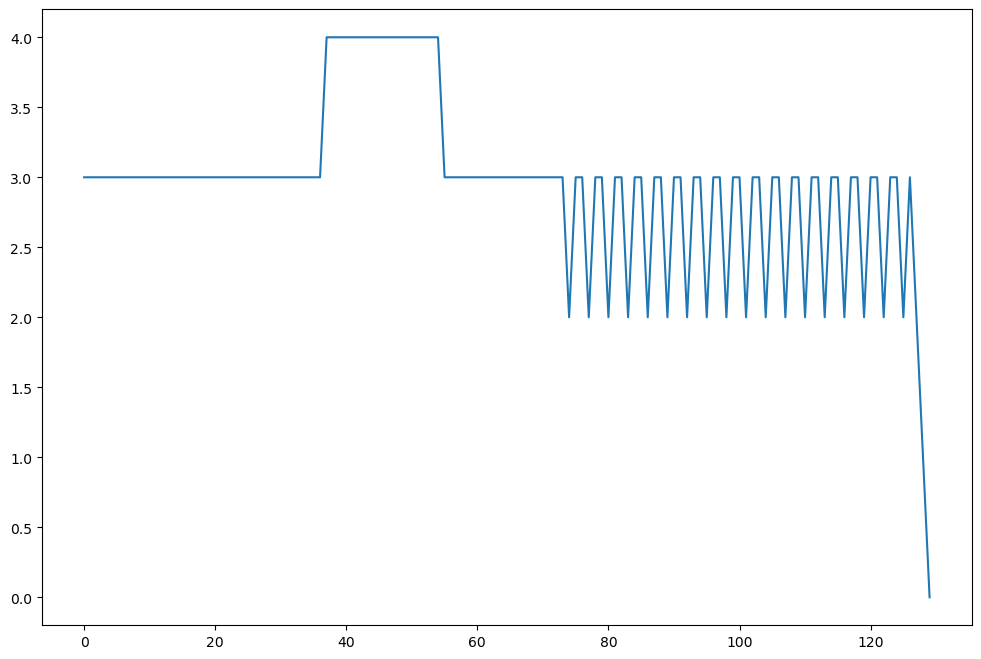

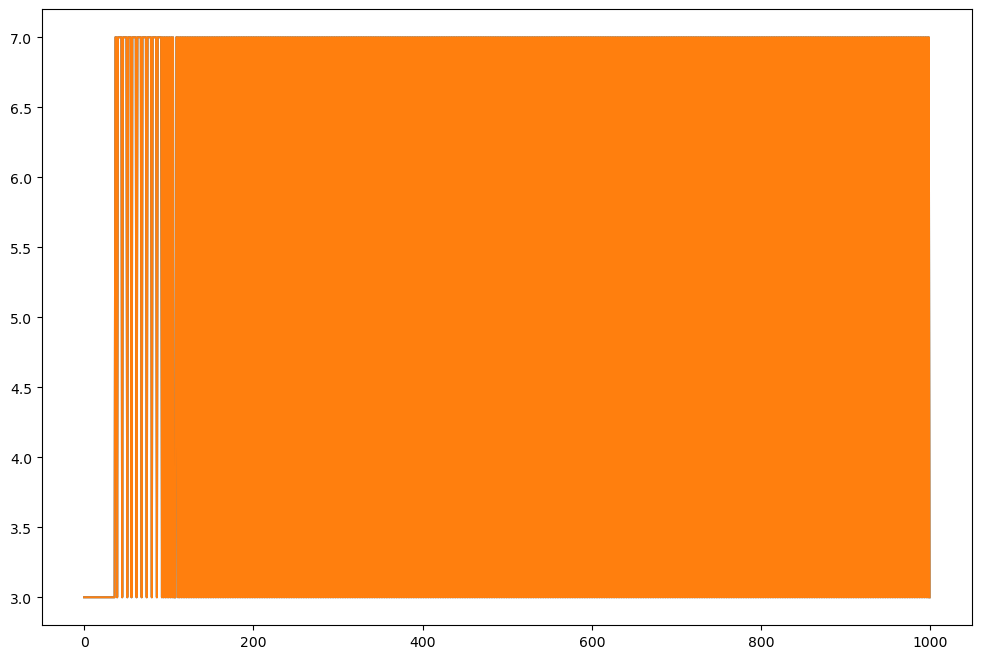

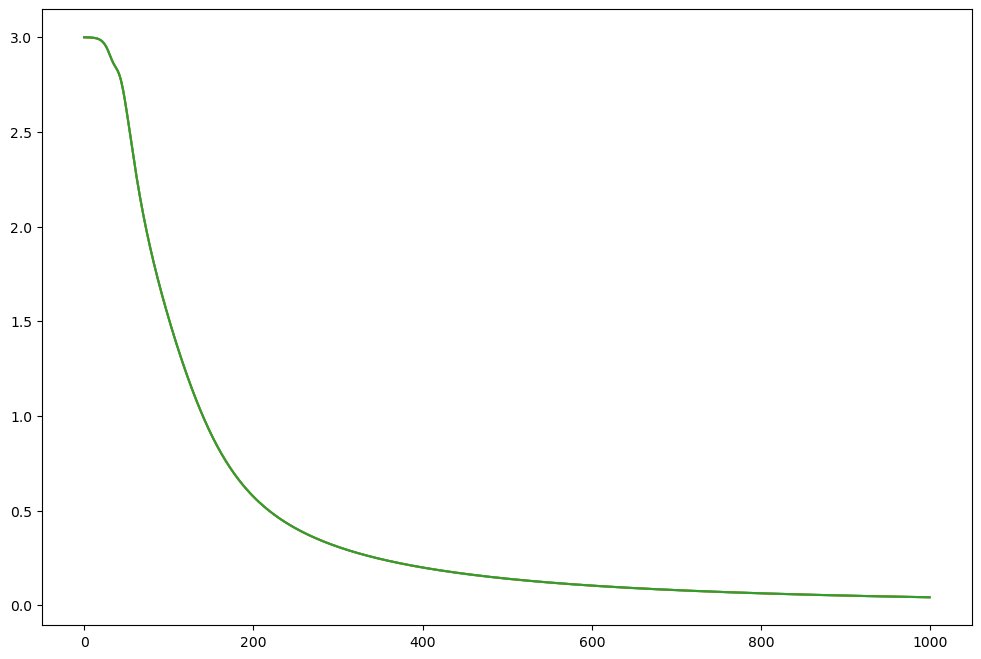

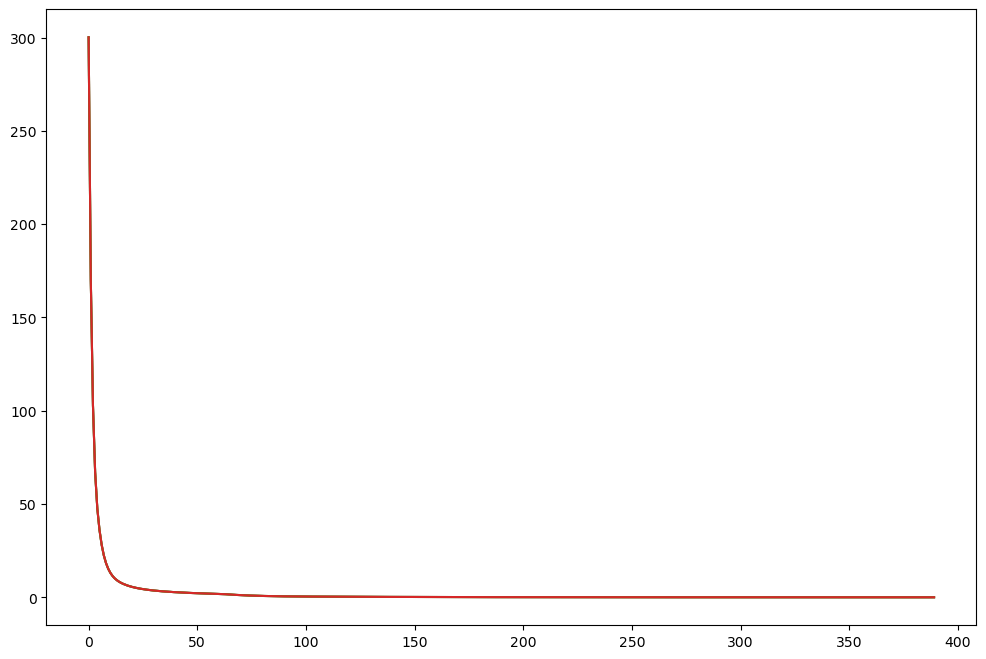

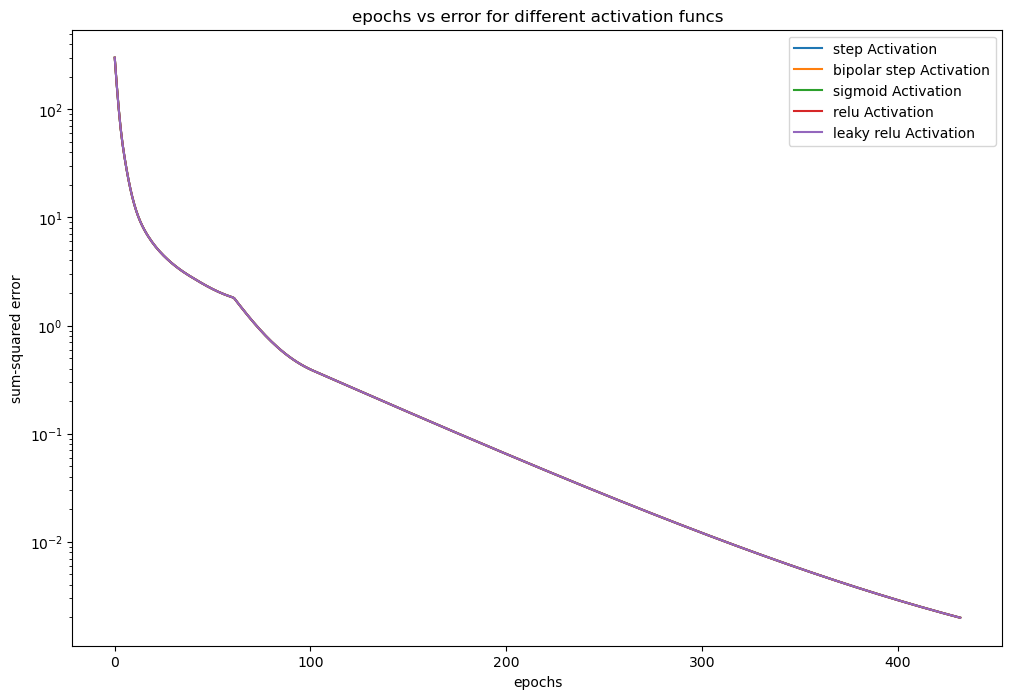

In [9]:
#QUESTION A3

def train_perceptron(X, y, act_func, w0, w1, w2, lr, max_epochs=1000, error_threshold=0.002):
    errors = []
    weights = np.array([w0, w1, w2])
    
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            #add bias input
            inputs = np.append(1, X[i])
            #weighted sum
            weighted_sum = np.dot(inputs, weights)
            #activation function
            output = act_func(weighted_sum)
            #calculate error
            error = y[i] - output
            total_error += error ** 2
            #update weights
            weights += lr * error * inputs
        
        errors.append(total_error)
        
        #stop if error below threshold
        if total_error <= error_threshold:
            break
    
    return weights, epoch + 1, errors

#AND gate input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

#initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
lr = 0.05

#train perceptron with different activation funcs
act_funcs = {
    "step": step,
    "bipolar step": bipolar_step,
    "sigmoid": sigmoid,
    "relu": relu,
    "leaky relu": leaky_relu
}

results = {}

for name, func in act_funcs.items():
    final_weights, epochs, error_history = train_perceptron(X, y, func, w0, w1, w2, lr)
    results[name] = {
        "final_weights": final_weights,
        "epochs": epochs,
        "error_history": error_history
    }
    print(f"{name} activation:")
    print(f"final weights: {final_weights}")
    print(f"epochs: {epochs}")
    print("-" * 40)

    plt.figure(figsize=(12, 8))

    # Plotting the error history
    for name, result in results.items():
        plt.plot(range(len(error_history)), error_history, label=f'{name} Activation')

plt.xlabel('epochs')
plt.ylabel('sum-squared error')
plt.yscale('log')
plt.title('epochs vs error for different activation funcs')
plt.legend()
plt.show()


Learning rate: 0.1, Converged in 68 epochs
Learning rate: 0.2, Converged in 37 epochs
Learning rate: 0.3, Converged in 23 epochs
Learning rate: 0.4, Converged in 23 epochs
Learning rate: 0.5, Converged in 20 epochs
Learning rate: 0.6, Converged in 19 epochs
Learning rate: 0.7, Converged in 15 epochs
Learning rate: 0.8, Converged in 14 epochs
Learning rate: 0.9, Converged in 13 epochs
Learning rate: 1, Converged in 14 epochs


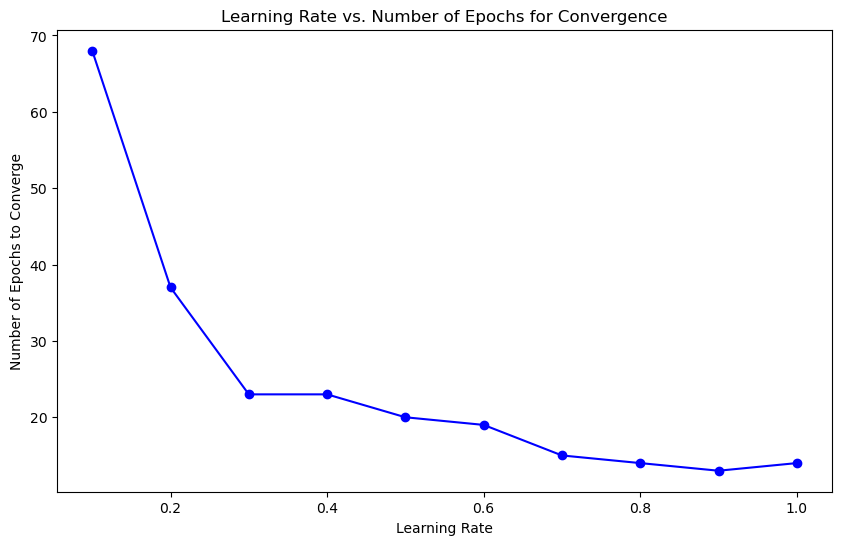

In [11]:
#QUESTION A4

import numpy as np
import matplotlib.pyplot as plt

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.05, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.array([10, 0.2, -0.75])  #initial weights 
        self.error_history = []
    
    def fit(self, X, y):
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X)):
                xi = np.insert(X[i], 0, 1)  #add bias 
                net_input = np.dot(xi, self.weights)
                prediction = step(net_input)
                
                error = y[i] - prediction
                total_error += error ** 2
                
                #update weights
                self.weights += self.learning_rate * error * xi

            self.error_history.append(total_error)
            if total_error <= 0.002:
                return epoch + 1
        return self.epochs

#define AND gate data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  #output of AND gate

#learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
epochs_to_converge = []

#train perceptron with different learning rates
for lr in learning_rates:
    perceptron = Perceptron(learning_rate=lr, epochs=1000)
    epochs = perceptron.fit(X, y)
    epochs_to_converge.append(epochs)
    print(f'Learning rate: {lr}, Converged in {epochs} epochs')

#plot number of epochs to converge against learning rates
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, epochs_to_converge, marker='o', linestyle='-', color='b')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Epochs to Converge')
plt.title('Learning Rate vs. Number of Epochs for Convergence')
#plt.grid(True)
plt.show()

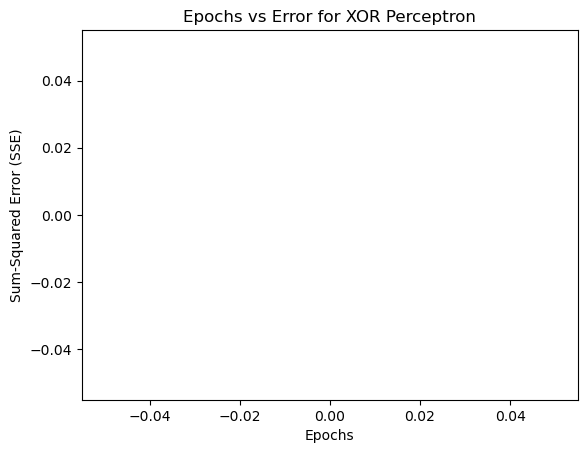

Did not converge within 1000 epochs


In [13]:
#QUESTION A5

import matplotlib.pyplot as plt

def step(val):  #step activation function
    return 1 if val > 0 else 0

def sum_unit(inputs, weights, bias):
    total = 0
    for i in range(len(inputs)):
        total += inputs[i] * weights[i]
    return total + bias

def error_comparator(predicted, actual):
    return actual - predicted

#initialize weights and bias
weights = [0.2, -0.75]  # W1, W2
bias = 10               # W0
learning_rate = 0.05

# XOR truth table inputs and outputs
training_data = [
    ([0, 0], 0),  
    ([0, 1], 1),
    ([1, 0], 1),
    ([1, 1], 0)
]

#training perceptron
epochs = 1000  # Limit for the number of epochs
errors_per_epoch = []  # To track the SSE after each epoch
converged = False
epoch_count = 0

#training loop
for epoch in range(epochs):
    total_error = 0  # Sum of squared errors for this epoch
    for inputs, target in training_data:
        # Calculate the weighted sum
        output = sum_unit(inputs, weights, bias)
        prediction = step(output)  # Using the provided step activation function

        # Compute error
        error = error_comparator(prediction, target)

        # Update weights and bias
        for i in range(len(weights)):
            weights[i] += learning_rate * error * inputs[i]
        bias += learning_rate * error  # Update bias

        # Sum squared error for this training sample
        total_error += error ** 2

    # Track total error for this epoch
    errors_per_epoch.append(total_error)

    # Check for convergence (i.e., total error is zero)
    if total_error == 0:
        converged = True
        epoch_count = epoch + 1  # Record the epoch where convergence occurred
        break

# Plot epochs vs SSE
plt.plot(range(1, epoch_count + 1), errors_per_epoch[:epoch_count])
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error (SSE)')
plt.title('Epochs vs Error for XOR Perceptron')
plt.show()

# Output the results
if converged:
    print(f"Weights converged after {epoch_count} epochs")
    print(f"Final weights: {weights}, bias: {bias}")
else:
    print(f"Did not converge within {epochs} epochs")


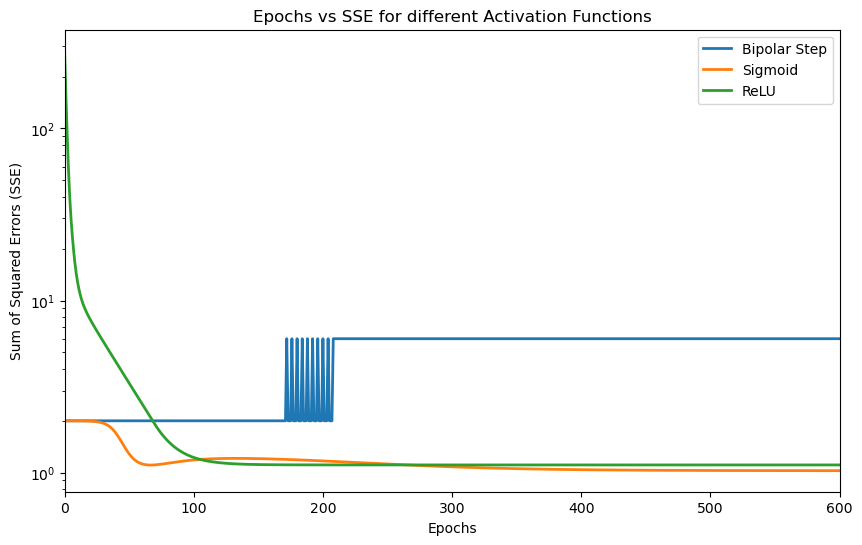

In [17]:
import matplotlib.pyplot as plt

# Initialize weights and parameters
W = [0.2, -0.75]  # Weights for the inputs
bias = 10  # Bias term
alpha = 0.05  # Learning rate
epochs = 1000  # Maximum number of epochs
XOR_input = [[0, 0], [0, 1], [1, 0], [1, 1]]  # XOR gate inputs
XOR_output = [0, 1, 1, 0]  # Expected XOR gate output

def train_perceptron(activation_func, epochs, W, bias, alpha):
    epoch_errors = []
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(XOR_input)):
            # Get the input and expected output
            inputs = XOR_input[i]
            target = XOR_output[i]
            
            # Calculate the sum of weighted inputs and bias
            weighted_sum = sum_unit(inputs, W, bias)
            
            # Apply the activation function
            output = activation_func(weighted_sum)
            
            # Compute error and update weights if necessary
            error = error_comparator(output, target)
            total_error += error**2
            
            # Update weights and bias
            for j in range(len(W)):
                W[j] += alpha * error * inputs[j]
            bias += alpha * error

        epoch_errors.append(total_error)
        if total_error == 0:  # Stop if converged
            break
    return epoch, epoch_errors

# Training and comparing epochs for each activation function
activation_functions = [bipolar_step, sigmoid, relu]
activation_names = ['Bipolar Step', 'Sigmoid', 'ReLU']
epochs_per_function = {}
errors_per_function = {}

for activation_func, name in zip(activation_functions, activation_names):
    W_copy = W[:]  # Reset weights for each run
    bias_copy = bias  # Reset bias
    epoch, errors = train_perceptron(activation_func, epochs, W_copy, bias_copy, alpha)
    epochs_per_function[name] = epoch + 1  # Record number of epochs
    errors_per_function[name] = errors

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot each activation function's errors with different styles and increased line width
for name, errors in errors_per_function.items():
    plt.plot(errors, label=name, linewidth=2)

# Use logarithmic scale for better distinction of small differences
plt.yscale('log')

# Set limits for the x-axis (focusing on initial epochs if necessary)
plt.xlim([0, 600])  # Adjust based on how many epochs are of interest

# Adding title and labels
plt.title('Epochs vs SSE for different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.legend()

# Display the plot
plt.show()

Learning rate: 0.1, Converged in 1000 epochs
Learning rate: 0.2, Converged in 1000 epochs
Learning rate: 0.3, Converged in 1000 epochs
Learning rate: 0.4, Converged in 1000 epochs
Learning rate: 0.5, Converged in 1000 epochs
Learning rate: 0.6, Converged in 1000 epochs
Learning rate: 0.7, Converged in 1000 epochs
Learning rate: 0.8, Converged in 1000 epochs
Learning rate: 0.9, Converged in 1000 epochs
Learning rate: 1, Converged in 1000 epochs


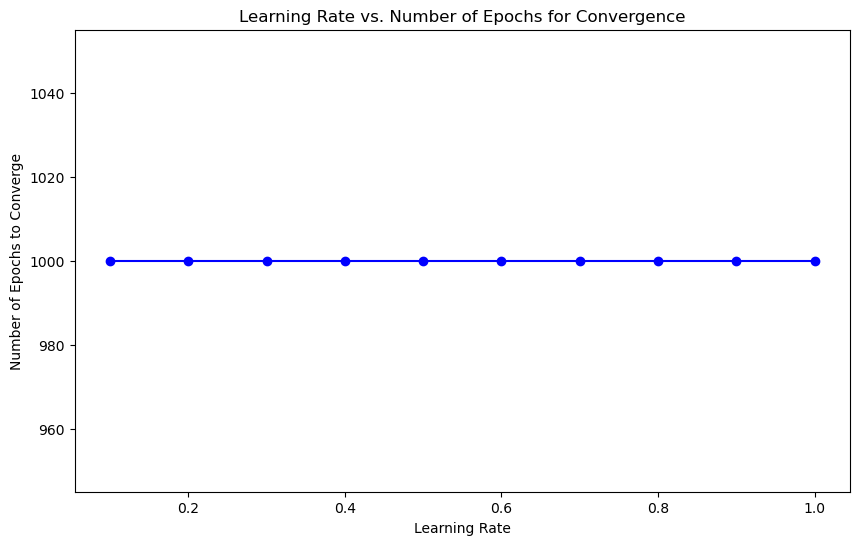

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.05, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.array([10, 0.2, -0.75])  #initial weights 
        self.error_history = []
    
    def fit(self, X, y):
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X)):
                xi = np.insert(X[i], 0, 1)  #add bias 
                net_input = np.dot(xi, self.weights)
                prediction = step(net_input)
                
                error = y[i] - prediction
                total_error += error ** 2
                
                #update weights
                self.weights += self.learning_rate * error * xi

            self.error_history.append(total_error)
            if total_error <= 0.002:
                return epoch + 1
        return self.epochs

#define AND gate data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  #output of XOR gate

#learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
epochs_to_converge = []

#train perceptron with different learning rates
for lr in learning_rates:
    perceptron = Perceptron(learning_rate=lr, epochs=1000)
    epochs = perceptron.fit(X, y)
    epochs_to_converge.append(epochs)
    print(f'Learning rate: {lr}, Converged in {epochs} epochs')

#plot number of epochs to converge against learning rates
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, epochs_to_converge, marker='o', linestyle='-', color='b')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Epochs to Converge')
plt.title('Learning Rate vs. Number of Epochs for Convergence')
#plt.grid(True)
plt.show()

The model converged in 1000 epochs.


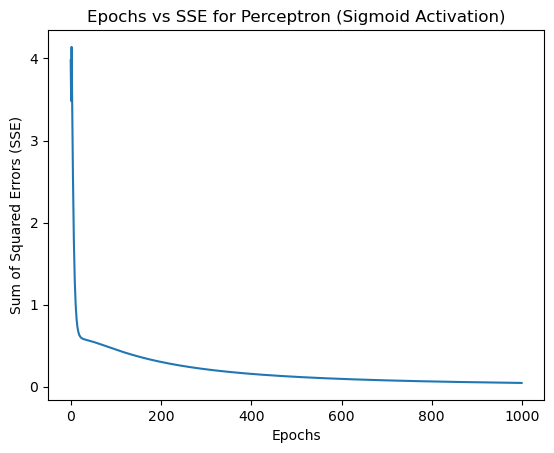

Final Weights: [-0.66761689  4.76516919 -0.12628646  0.63237662]
Final Bias: [-0.32722684]


In [21]:
#QUESTION A6

import numpy as np
import matplotlib.pyplot as plt

# Data
data = [
    [20, 6, 2, 386],  # C_1
    [16, 3, 6, 289],  # C_2
    [27, 6, 2, 393],  # C_3
    [19, 1, 2, 110],  # C_4
    [24, 4, 4, 280],  # C_5
    [22, 1, 5, 167],  # C_6
    [15, 4, 2, 271],  # C_7
    [18, 4, 2, 274],  # C_8
    [21, 1, 4, 148],  # C_9
    [16, 2, 4, 198],  # C_10
]

# Convert 'Yes' to 1 and 'No' to 0 for the high-value classification
labels = [1, 1, 1, 0, 1, 0, 1, 1, 0, 0]  # High-value transactions (Yes = 1, No = 0)

# Normalize the payment feature to ensure better training (optional)
data = np.array(data)
data[:, -1] = data[:, -1] / 400  # Normalizing payments assuming Rs 400 as the max

# Initialize parameters
weights = np.random.rand(data.shape[1])  # Random weights for each feature
bias = np.random.rand(1)  # Random bias
alpha = 0.01  # Learning rate
epochs = 1000  # Maximum epochs

# Perceptron training function with sigmoid activation
def train_perceptron_sigmoid(data, labels, weights, bias, alpha, epochs):
    epoch_errors = []
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(data)):
            inputs = data[i]
            target = labels[i]
            
            # Calculate the weighted sum + bias using sum_unit function
            weighted_sum = sum_unit(inputs, weights, bias)
            
            # Apply the sigmoid activation function
            output = sigmoid(weighted_sum)
            
            # Compute the error and update weights and bias
            error = error_comparator(output, target)
            total_error += error**2  # Sum of Squared Errors
            
            # Update the weights and bias using the perceptron learning rule
            weights += alpha * error * inputs
            bias += alpha * error

        epoch_errors.append(total_error)
        if total_error < 0.001:  # Stop if the error is small enough
            break
    return epoch_errors, weights, bias

# Train the perceptron using sigmoid activation function
epoch_errors, final_weights, final_bias = train_perceptron_sigmoid(data, labels, weights, bias, alpha, epochs)

# Output the number of epochs to converge
print(f'The model converged in {len(epoch_errors)} epochs.')

# Plot the error over epochs
plt.plot(epoch_errors)
plt.title('Epochs vs SSE for Perceptron (Sigmoid Activation)')
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

# Output final weights and bias
print(f'Final Weights: {final_weights}')
print(f'Final Bias: {final_bias}')

In [23]:
#QUESTION A7

import numpy as np

# Data from the table
X = np.array([
    [20, 6, 2, 386],  # C_1
    [16, 3, 6, 289],  # C_2
    [27, 6, 2, 393],  # C_3
    [19, 1, 2, 110],  # C_4
    [24, 4, 4, 280],  # C_5
    [22, 1, 5, 167],  # C_6
    [15, 4, 2, 271],  # C_7
    [18, 4, 2, 274],  # C_8
    [21, 1, 4, 148],  # C_9
    [16, 2, 4, 198],  # C_10
])

# High value transaction (Yes = 1, No = 0)
y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Add bias term (column of 1's)
X_bias = np.hstack((np.ones((X.shape[0], 1)), X))

# Compute pseudo-inverse
pseudo_inv = np.linalg.pinv(X_bias)

# Compute weights
weights_pseudo_inverse = np.dot(pseudo_inv, y)
print("Weights from Matrix Pseudo-Inverse: ", weights_pseudo_inverse)


Weights from Matrix Pseudo-Inverse:  [ 0.25853835 -0.02702002  0.77833454  0.22297395 -0.00934033]


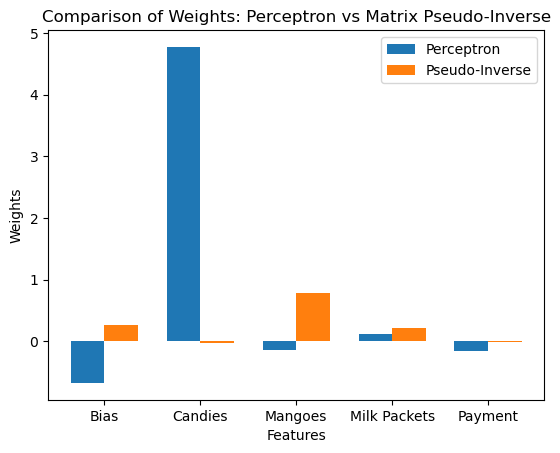

In [25]:
#comparison between pseudo inverse matrix and perceptron 

# Weights from Perceptron Learning
weights_perceptron = np.array([-0.67370793, 4.77257054, -0.14357671, 0.12561127, -0.16432632])

# Feature names including bias
features = ['Bias', 'Candies', 'Mangoes', 'Milk Packets', 'Payment']

# Set up the plot
x = np.arange(len(features))  # the label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots()

# Plot bars for perceptron and pseudo-inverse weights
bars1 = ax.bar(x - width/2, weights_perceptron, width, label='Perceptron')
bars2 = ax.bar(x + width/2, weights_pseudo_inverse, width, label='Pseudo-Inverse')

# Add labels, title, and legend
ax.set_xlabel('Features')
ax.set_ylabel('Weights')
ax.set_title('Comparison of Weights: Perceptron vs Matrix Pseudo-Inverse')
ax.set_xticks(x)
ax.set_xticklabels(features)
ax.legend()

# Display plot
plt.show()

In [27]:
#QUESTION A8

def train_and_gate(learning_rate=0.05, max_iterations=1000, error_threshold=0.002):
    # Initialize weights and bias
    weights = np.random.uniform(-0.1, 0.1, 2)  # Two inputs for AND gate
    bias = np.random.uniform(-0.1, 0.1)  # Single bias

    # Training data for AND gate
    inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    outputs = np.array([0, 0, 0, 1])  # Expected outputs for AND gate

    for iteration in range(max_iterations):
        total_error = 0
        for x, y in zip(inputs, outputs):
            #forward pass
            weighted_sum = sum_unit(x, weights, bias)
            predicted = sigmoid(weighted_sum)

            #calculate error
            error = y - predicted
            total_error += abs(error)

            #backward pass (update weights and bias)
            weights += learning_rate * error * predicted * (1 - predicted) * x
            bias += learning_rate * error * predicted * (1 - predicted)

        mse = total_error / len(outputs)
        # Check for convergence
        if mse <= error_threshold:
            print(f'Converged after {iteration+1} iterations')
            break
    else:
        print('Reached maximum iterations without convergence')

    return weights, bias

#train the neural network for AND gate
trained_weights, trained_bias = train_and_gate()
print('Trained Weights:', trained_weights)
print('Trained Bias:', trained_bias)

Reached maximum iterations without convergence
Trained Weights: [1.81467289 1.80800725]
Trained Bias: -2.869983571895954


In [29]:
#QUESTION A9

# Constants
alpha = 0.05  # Learning rate
max_iterations = 1000
convergence_error = 0.002

# XOR inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize weights randomly for hidden and output layers
def initialize_weights(input_size, hidden_size, output_size):
    hidden_weights = np.random.uniform(-0.1, 0.1, (input_size, hidden_size))
    hidden_bias = np.random.uniform(-0.1, 0.1, hidden_size)
    output_weights = np.random.uniform(-0.1, 0.1, (hidden_size, output_size))
    output_bias = np.random.uniform(-0.1, 0.1, output_size)
    return hidden_weights, hidden_bias, output_weights, output_bias

# Activation functions
def sigmoid(val):
    return 1 / (1 + np.exp(-val))

# Train the network
def train_xor():
    input_size = 2
    hidden_size = 2  # Hidden layer size for XOR
    output_size = 1

    # Initialize weights
    hidden_weights, hidden_bias, output_weights, output_bias = initialize_weights(input_size, hidden_size, output_size)

    for iteration in range(max_iterations):
        total_error = 0

        for i in range(len(X)):
            # Forward pass
            hidden_layer_input = np.dot(X[i], hidden_weights) + hidden_bias
            hidden_layer_output = sigmoid(hidden_layer_input)

            final_input = np.dot(hidden_layer_output, output_weights) + output_bias
            predicted_output = sigmoid(final_input)

            # Calculate error
            error = y[i] - predicted_output
            total_error += np.abs(error)

            # Backward pass
            d_predicted_output = error * predicted_output * (1 - predicted_output)
            error_hidden_layer = d_predicted_output.dot(output_weights.T) * hidden_layer_output * (1 - hidden_layer_output)

            # Update weights and biases
            output_weights += hidden_layer_output.reshape(-1, 1).dot(d_predicted_output.reshape(1, -1)) * alpha
            output_bias += d_predicted_output * alpha
            hidden_weights += X[i].reshape(-1, 1).dot(error_hidden_layer.reshape(1, -1)) * alpha
            hidden_bias += error_hidden_layer * alpha

        # Check convergence
        if total_error <= convergence_error:
            print(f"Converged after {iteration + 1} iterations.")
            break
    else:
        print("Reached maximum iterations without convergence.")

    print("Trained Hidden Weights:\n", hidden_weights)
    print("Trained Hidden Bias:\n", hidden_bias)
    print("Trained Output Weights:\n", output_weights)
    print("Trained Output Bias:\n", output_bias)

# Run the training
train_xor()

Reached maximum iterations without convergence.
Trained Hidden Weights:
 [[ 0.01989607 -0.102647  ]
 [-0.08900703  0.04912693]]
Trained Hidden Bias:
 [-0.10434604  0.08426197]
Trained Output Weights:
 [[0.01655223]
 [0.04907345]]
Trained Output Bias:
 [-0.03293583]


In [33]:
#QUESTION A10

#constants
alpha = 0.05  #learning rate
max_iterations = 1000
convergence_error = 0.002

# AND and XOR inputs and outputs
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])  # [1, 0] for 0, [0, 1] for 1

X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])  # [1, 0] for 0, [0, 1] for 1

#initialize weights randomly for hidden and output layers
def initialize_weights(input_size, hidden_size, output_size):
    hidden_weights = np.random.uniform(-0.1, 0.1, (input_size, hidden_size))
    hidden_bias = np.random.uniform(-0.1, 0.1, hidden_size)
    output_weights = np.random.uniform(-0.1, 0.1, (hidden_size, output_size))
    output_bias = np.random.uniform(-0.1, 0.1, output_size)
    return hidden_weights, hidden_bias, output_weights, output_bias

#train the network
def train_neural_network(X, y, gate_name):
    input_size = 2
    hidden_size = 2  #hidden layer size
    output_size = 2  #output layer size

    #initialize weights
    hidden_weights, hidden_bias, output_weights, output_bias = initialize_weights(input_size, hidden_size, output_size)

    for iteration in range(max_iterations):
        total_error = 0

        for i in range(len(X)):
            #forward pass
            hidden_layer_input = np.dot(X[i], hidden_weights) + hidden_bias
            hidden_layer_output = sigmoid(hidden_layer_input)

            final_input = np.dot(hidden_layer_output, output_weights) + output_bias
            predicted_output = sigmoid(final_input)

            #calculate error
            error = y[i] - predicted_output
            total_error += np.abs(error).sum()

            #backward pass
            d_predicted_output = error * predicted_output * (1 - predicted_output)
            error_hidden_layer = d_predicted_output.dot(output_weights.T) * hidden_layer_output * (1 - hidden_layer_output)

            #update weights and biases
            output_weights += hidden_layer_output.reshape(-1, 1).dot(d_predicted_output.reshape(1, -1)) * alpha
            output_bias += d_predicted_output * alpha
            hidden_weights += X[i].reshape(-1, 1).dot(error_hidden_layer.reshape(1, -1)) * alpha
            hidden_bias += error_hidden_layer * alpha

        #check convergence
        if total_error <= convergence_error:
            print(f"{gate_name} Converged after {iteration + 1} iterations.")
            break
    else:
        print(f"{gate_name} Reached maximum iterations without convergence.")

    print(f"{gate_name} Trained Hidden Weights:\n", hidden_weights)
    print(f"{gate_name} Trained Hidden Bias:\n", hidden_bias)
    print(f"{gate_name} Trained Output Weights:\n", output_weights)
    print(f"{gate_name} Trained Output Bias:\n", output_bias)

#train AND gate
train_neural_network(X_and, y_and, "AND Gate")

#train XOR gate
train_neural_network(X_xor, y_xor, "XOR Gate")


AND Gate Reached maximum iterations without convergence.
AND Gate Trained Hidden Weights:
 [[-0.94898957 -0.89973427]
 [-0.88614818 -1.04143838]]
AND Gate Trained Hidden Bias:
 [0.27329712 0.35211516]
AND Gate Trained Output Weights:
 [[ 1.01987547 -1.01887328]
 [ 1.05879813 -1.11574085]]
AND Gate Trained Output Bias:
 [ 0.30447257 -0.28090537]
XOR Gate Reached maximum iterations without convergence.
XOR Gate Trained Hidden Weights:
 [[ 0.0270835  -0.032567  ]
 [ 0.00941733 -0.04949543]]
XOR Gate Trained Hidden Bias:
 [ 0.02526752 -0.08752587]
XOR Gate Trained Output Weights:
 [[ 0.07883606  0.01881827]
 [-0.02457219 -0.05405524]]
XOR Gate Trained Output Bias:
 [-0.0288187   0.01570807]


In [35]:
#QUESTION A11

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


In [37]:
# AND Gate Data
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # inputs
y_and = np.array([0, 0, 0, 1])  # outputs (AND logic)

# Define MLPClassifier for AND Gate
mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, learning_rate_init=0.05)

# Train the model
mlp_and.fit(X_and, y_and)

# Predict the output
y_pred_and = mlp_and.predict(X_and)

# Check accuracy
accuracy_and = accuracy_score(y_and, y_pred_and)

print("AND Gate Predictions:", y_pred_and)
print("AND Gate Accuracy:", accuracy_and)

AND Gate Predictions: [0 0 0 1]
AND Gate Accuracy: 1.0


In [39]:
# XOR Gate Data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # inputs
y_xor = np.array([0, 1, 1, 0])  # outputs (XOR logic)

# Define MLPClassifier for XOR Gate
mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, learning_rate_init=0.05)

# Train the model
mlp_xor.fit(X_xor, y_xor)

# Predict the output
y_pred_xor = mlp_xor.predict(X_xor)

# Check accuracy
accuracy_xor = accuracy_score(y_xor, y_pred_xor)

print("XOR Gate Predictions:", y_pred_xor)
print("XOR Gate Accuracy:", accuracy_xor)

XOR Gate Predictions: [0 1 1 0]
XOR Gate Accuracy: 1.0


In [55]:
#QUESTION A12

print(data.isnull().sum())

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64


In [57]:
# Fill null values with the mean of each column
data['absolute_magnitude'].fillna(data['absolute_magnitude'].mean(), inplace=True)
data['estimated_diameter_min'].fillna(data['estimated_diameter_min'].mean(), inplace=True)
data['estimated_diameter_max'].fillna(data['estimated_diameter_max'].mean(), inplace=True)

print(data.isnull().sum())

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64


In [63]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

#encoding categorical variable 'orbiting_body'
label_encoder = LabelEncoder()
data['orbiting_body'] = label_encoder.fit_transform(data['orbiting_body'])

#splitting features and target
X = data[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance', 'orbiting_body']]
y = data['is_hazardous'].astype(int)

#standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#train MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation='logistic', learning_rate_init=0.05, max_iter=1000)
mlp.fit(X_train, y_train)

#predictions and evaluation
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8837817859254878


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     59011
           1       0.78      0.12      0.21      8629

    accuracy                           0.88     67640
   macro avg       0.83      0.56      0.58     67640
weighted avg       0.87      0.88      0.84     67640

Confusion Matrix:
[[58714   297]
 [ 7564  1065]]


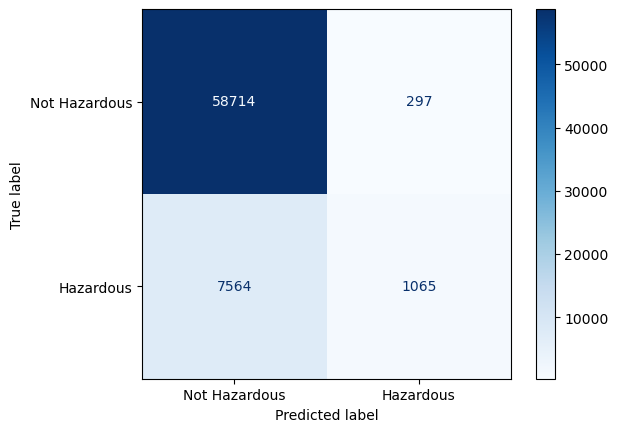

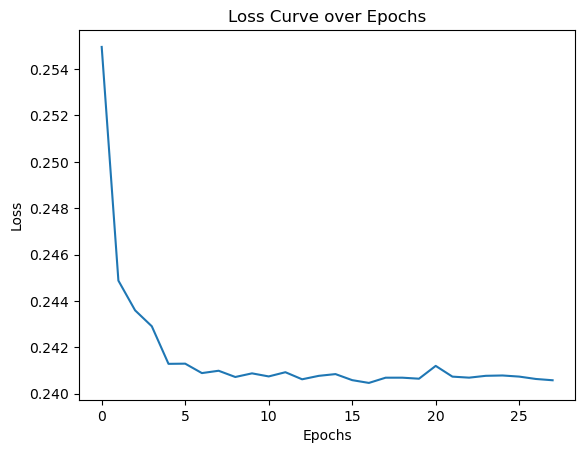

Hidden Layer Weights:
 [[ 1.41811406e+001  6.50538158e-003 -2.18908394e-001  6.25600132e-003
  -3.73570931e-001  5.92624665e+000 -1.11389658e+000  4.20172902e-003
   4.75309431e-003  2.25851925e+001]
 [-4.34351885e+000 -3.79000076e-003 -1.82047866e-002 -3.88612062e-003
  -2.36396146e+000 -1.73388715e+000  1.33163345e+000 -3.55843484e-003
  -9.92629593e-003 -1.55034598e+001]
 [-4.33856944e+000 -3.79000076e-003  2.46247638e-001 -3.88612062e-003
  -2.36403558e+000 -1.73391219e+000  1.33937284e+000 -3.55843484e-003
  -9.92629593e-003 -1.54914614e+001]
 [-3.35739532e-002 -3.67252573e-003 -3.98014138e-001 -3.35199812e-003
   8.92681117e-001 -7.62830998e+000 -1.13300667e+001 -2.36934716e-003
   8.09070914e-003 -1.47685550e-001]
 [ 9.46898482e-001 -1.64072699e-003 -6.87231150e+000 -1.47426247e-003
  -6.82325956e-001 -2.11184787e+000  7.47155457e-001 -1.06772755e-003
  -1.03558144e-002 -1.94553275e-001]
 [-1.25481044e-316  2.97146050e-317  1.99860897e-316  2.68955835e-316
   1.97429828e-316 -1.

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

#Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Hazardous', 'Hazardous'])
disp.plot(cmap='Blues')
plt.show()

#Monitoring the Loss Curve
plt.plot(mlp.loss_curve_)
plt.title('Loss Curve over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#Weights and Biases
print("Hidden Layer Weights:\n", mlp.coefs_[0])  # Weights between input and hidden layer
print("Output Layer Weights:\n", mlp.coefs_[1])  # Weights between hidden and output layer
print("Hidden Layer Biases:\n", mlp.intercepts_[0])  # Biases in hidden layer
print("Output Layer Biases:\n", mlp.intercepts_[1])  # Biases in output layer